#   Number MNIST GAN
##  A Handwritten Digit Generation Network

##   Imports
All library imports are carried out here.

In [5]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.layers import Conv2D, LeakyReLU, Dropout, Flatten, Dense
from keras.models import Sequential

##   Reference Material
Below are links to all reference material utilised when producing this system.

In [6]:
#   https://medium.com/ml-everything/generating-letters-using-generative-adversarial-networks-gans-161b0be3c229

#   https://towardsdatascience.com/alphabet-gan-ai-generates-english-letters-589637068808

#   https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

##   Loading MNIST Data
Here, the MNIST data set is loaded and visualised to verify a successful load.

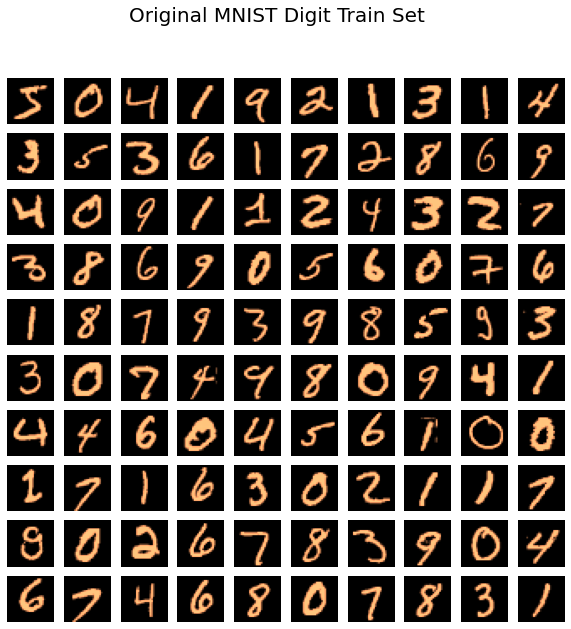

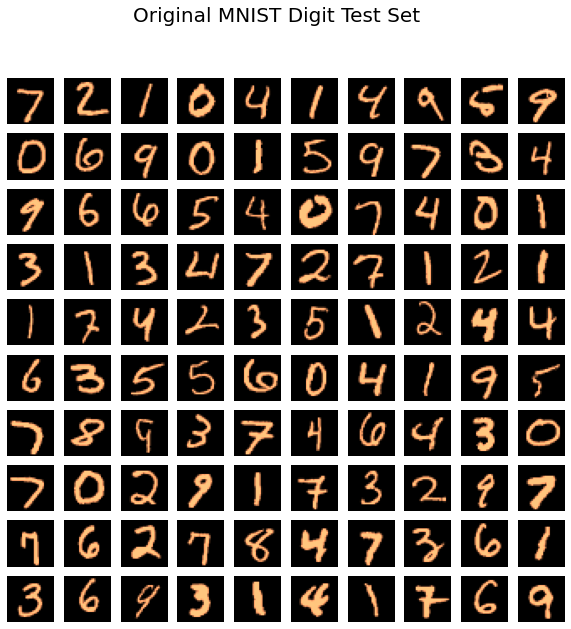

In [7]:
#  Loading the dataset into a train, test split format

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#  Define the dimensions for the image data
width, height, channel = 28, 28, 1


#  Define a function to visualise the data as an image
def visualise_data(data, title=""):
    #   Create a plot that is 10x10 in size
    plt.figure(figsize=(10, 10))

    #   Initialise a counter to increment using
    counter = 1

    #   Loop over all items within the data array
    for item in data:
        #   Add a subplot that is 10x10 and uses counter as an index
        plt.subplot(10, 10, counter)

        #   Accepts image data, in this case resizing the item to match given dimensions and using the copper colour map
        plt.imshow(item.reshape((height, width)), cmap='copper')

        #   Disable the axis
        plt.axis('off')

        #   Increment the counter
        counter += 1

        #   As we only want to plot 100 items, we break the loop when the counter is larger than 100
        if counter > 100: break

    #   Apply a title to the plot
    plt.suptitle(title, fontsize=20)

    #   Display the plot
    plt.show()


#  Visualise the training and testing sets
visualise_data(x_train, title="Original MNIST Digit Train Set")
visualise_data(x_test, title="Original MNIST Digit Test Set")

##  Defining the Discriminator Model


In [8]:
#   Define the discriminator model
#   Pass a default shape of 28x28 pixels with 1 channel
def build_discriminator_model(shape=(28, 28, 1)):
    #   Declare a basic sequential model
    discriminator_model = Sequential()

    #   Add a Convolutional2D layer to the model
    discriminator_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=shape))

    #   Add a Leaky Rectified Linear Unit layer to the model
    discriminator_model.add(LeakyReLU(alpha=0.2))

    #   Add a Dropout layer to the model
    discriminator_model.add(Dropout(0.4))

    #   Repeat the same layer pattern
    discriminator_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    discriminator_model.add(LeakyReLU(alpha=0.2))
    discriminator_model.add(Dropout(0.4))

    #   Add a Flatten layer to the model to flatten the input
    discriminator_model.add(Flatten())

    #   Add a Dense (neural network) layer to the model
    discriminator_model.add(Dense(1, activation='sigmoid'))

    #   Define the optimiser to be used with the model
    optimiser = Adam(learning_rate=0.0002, beta_1=0.5)

    #   Compile the model
    discriminator_model.compile(loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])

    #   Return the model
    return discriminator_model


#   Create an instance of teh discriminator model
model = build_discriminator_model()

#   Print the summary of the model produced
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

##  Defining the Generator Model
